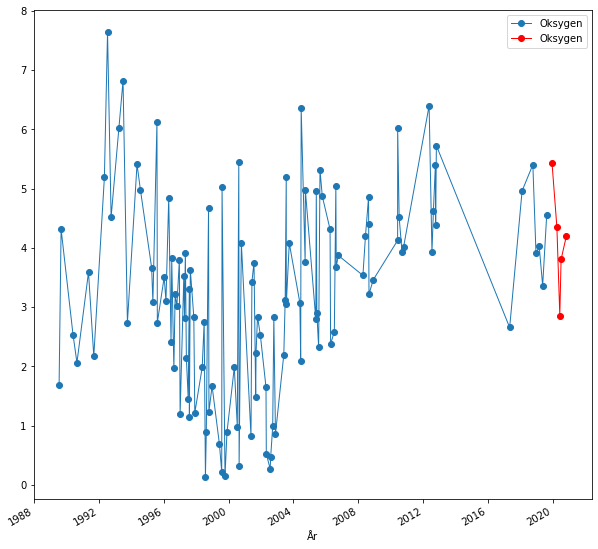

In [40]:
import csv
import datetime
import pandas as pd
import matplotlib.pyplot as plt

timeseries="../../Soerfjorden_Reports/Timeseries_oxygen_SOE72/1989_2019_dataset.csv"

columns=['År', 'Oksygen']
rows=[]
rows_recent=[]

with open(timeseries) as csv_file:
    cs = csv.reader(csv_file, delimiter=",")
    for row in cs:

        decimal_year=row[0]
        split_decimal_year=decimal_year.split(".")
        year=int(split_decimal_year[0])
        seconds = int((float(decimal_year)-year)*3.154e+7)

        date = datetime.datetime(year=year,day=1,month=1) + datetime.timedelta(seconds=seconds)
        row=[date, float(row[1])]
        rows.append(row)

# Manually add data from 2019 and 2020
row=[datetime.datetime(day=18,month=12, year=2019), 5.437581535]; rows_recent.append(row)
row=[datetime.datetime(day=6,month=4, year=2020), 4.352974394]; rows_recent.append(row)
row=[datetime.datetime(day=11,month=6, year=2020),2.859629517]; rows_recent.append(row)
row=[datetime.datetime(day=10, month=7,year=2020), 3.80752238]; rows_recent.append(row)
row=[datetime.datetime(day=6,month=11, year=2020), 4.200697682]; rows_recent.append(row)

df = pd.DataFrame(rows, columns=columns)
df_recent = pd.DataFrame(rows_recent, columns=columns)

#df['Date'] = pd.to_datetime(df['Date'])
df.set_index('År', inplace=True)
df_recent.set_index('År', inplace=True)

df=df.sort_index()
ax=df.plot(figsize=(10,10), linewidth=1, marker='o')
#df_resampled=df.resample("36M").mean()
#df_resampled.plot(color="red")
df_recent.plot(ax=ax, color="red",linewidth=1, marker='o')
plt.savefig("oxygen_history.png", dpi=200)